***Nom: David Morillo Massagué***

***NIU: 1666540***

# **Exercici 1**: Gradient Descent en Regressió Lineal

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import os

Dataset: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

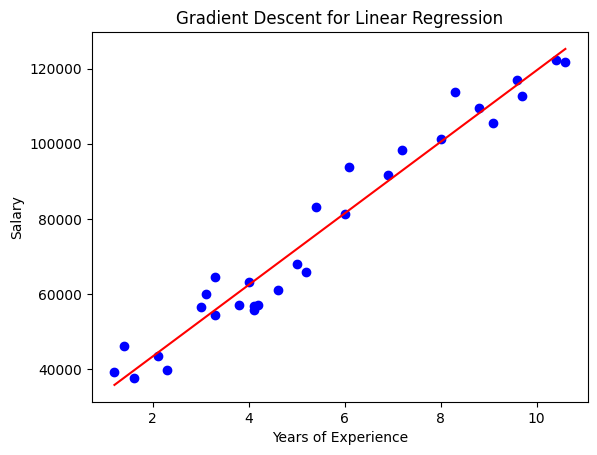

theta0: 24474.560142729504
theta1: 9504.800943794742


In [40]:
# Load data from CSV
df = pd.read_csv('Salary_dataset.csv', delimiter=',')

# Extract the necessary columns
X = df[['YearsExperience']].values
y = df[['Salary']].values

# Add a column of 1s for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize values
theta = np.random.randn(2, 1)
eta = 0.01  # learning rate
n_iter = 1000  # number of iterations

def gradient_descent(X_b, y, theta, eta, n_iter):
    # Gradient Descent
    for iteration in range(n_iter):
        gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= eta * gradients
    return theta

theta = gradient_descent(X_b, y, theta, eta, n_iter)


def visualize(X, y, X_b, theta):
    # Visualize results
    plt.scatter(X, y, color="blue")
    plt.plot(X, X_b.dot(theta), color="red")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.title("Gradient Descent for Linear Regression")
    plt.show()
    
visualize(X, y, X_b, theta)

print("theta0:", theta[0][0])
print("theta1:", theta[1][0])

C:\Users\david\AppData\Local\Temp\ipykernel_18068\1884171947.py:20: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * gradients


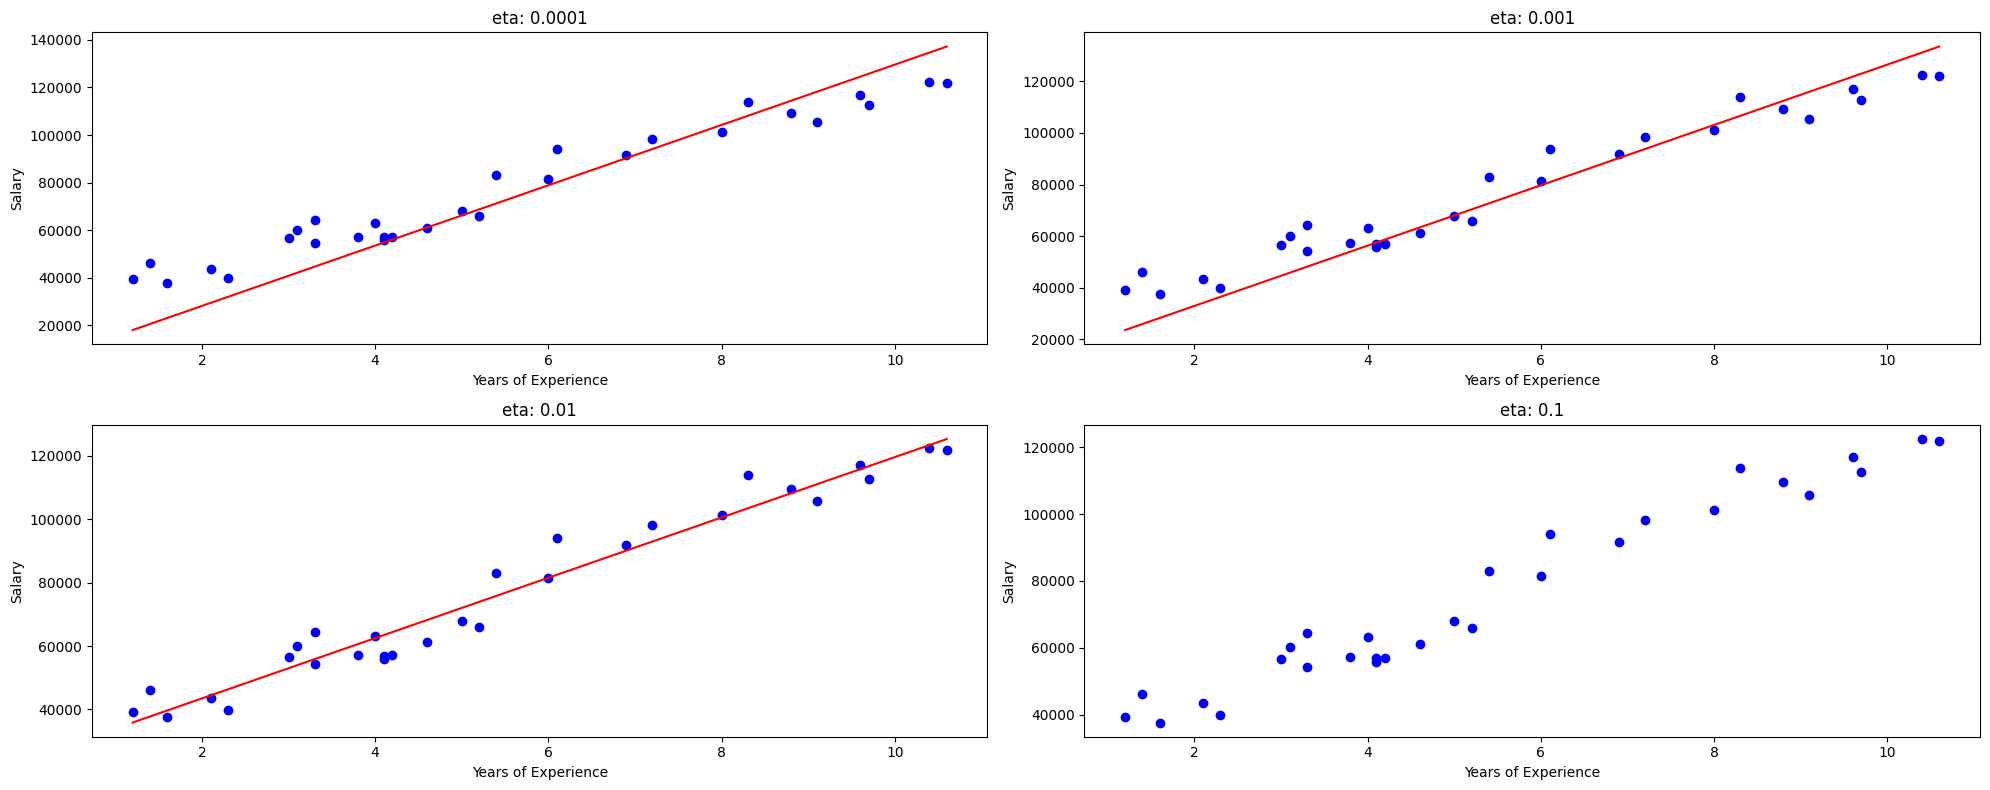

In [41]:
etas = [0.0001, 0.001, 0.01, 0.1]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
axes = axes.flatten()

for i, eta in enumerate(etas):
    theta = np.random.randn(2, 1)
    theta = gradient_descent(X_b, y, theta, eta, n_iter)
    axes[i].scatter(X, y, color="blue")
    axes[i].plot(X, X_b.dot(theta), color="red")
    axes[i].set_title(f"eta: {eta}")
    axes[i].set_xlabel("Years of Experience")
    axes[i].set_ylabel("Salary")

plt.tight_layout()
plt.show()

**1. Quins efectes tó la variació de la taxa d’aprenentatge (η) en el procés d’optimització?** Com veiem en el grafic, amb un nombre fixe de generacions i variant ETA, amb un learning rate massa petit, el model no arriba a convergir, ja que el pas que fa en cada iteració és massa petit. En canvi, si el learning rate és massa gran, el model pot no arribar a convergir tampoc, ja que el pas que fa en cada iteració és massa gran. A l'últim exemple ens retorna un error, i no es mostra la recta. Els valors 0.001 i 0.01 són els que millor s'ajusten al model, ja que el model convergeix en un nombre de generacions raonable.

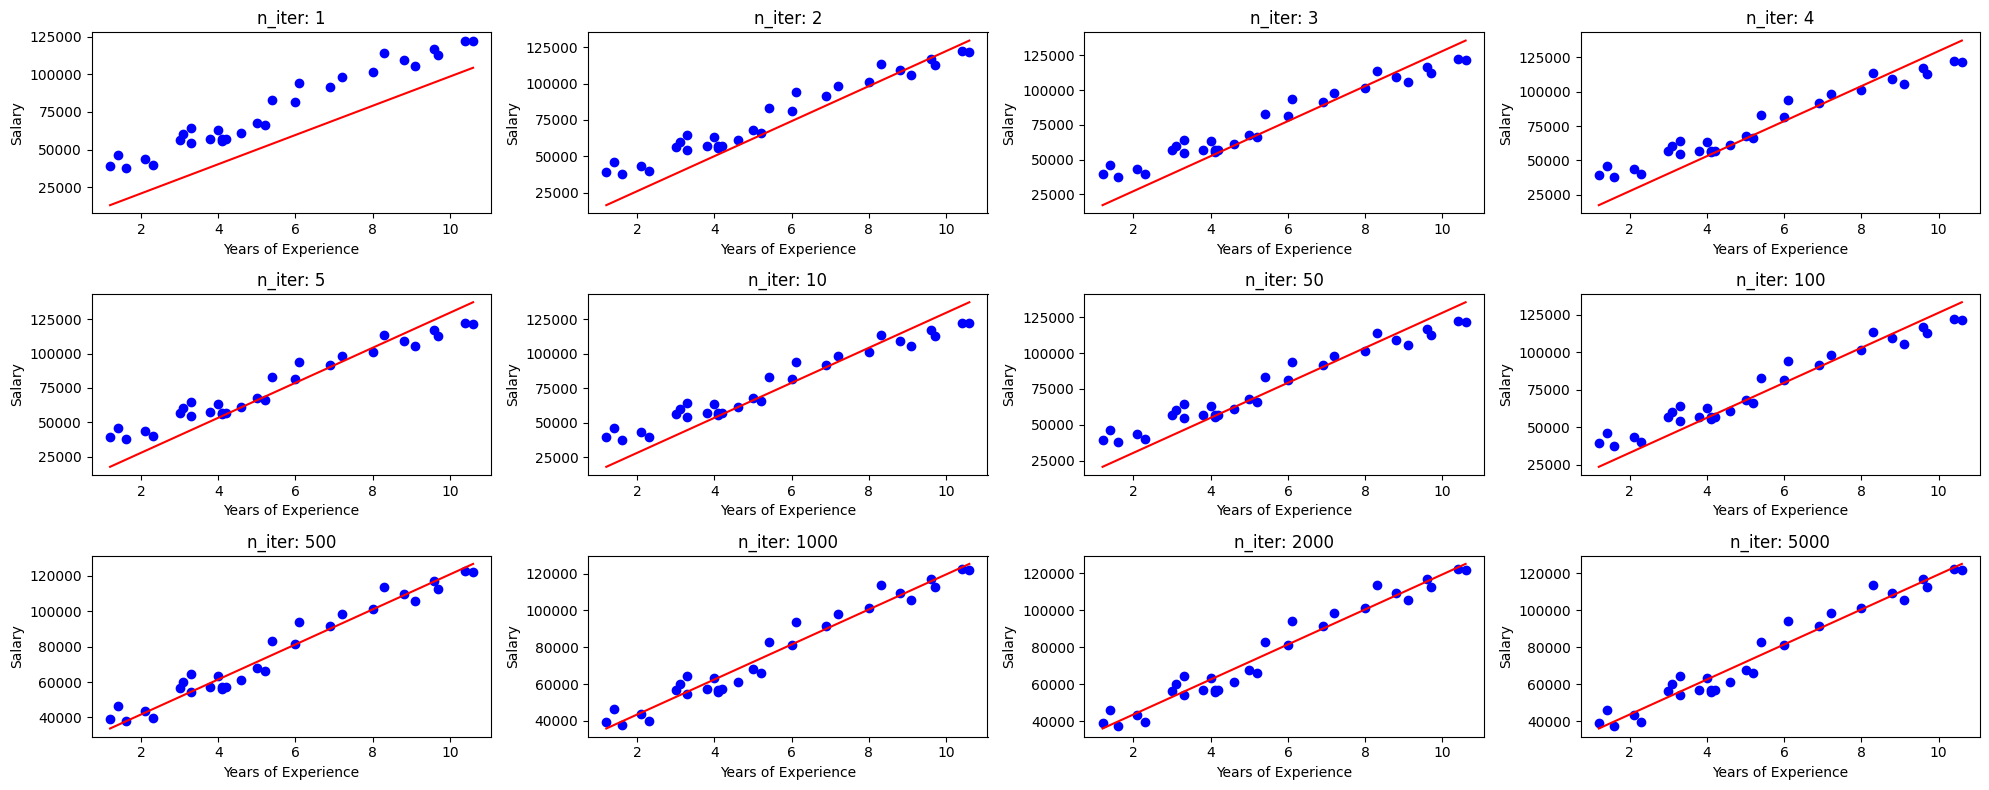

In [42]:
n_iters = [1,2,3,4,5,10, 50, 100, 500, 1000, 2000, 5000]
eta = 0.01

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))
axes = axes.flatten()

for i, n_iter in enumerate(n_iters):
    theta = np.random.randn(2, 1)
    theta = gradient_descent(X_b, y, theta, eta, n_iter)
    axes[i].scatter(X, y, color="blue")
    axes[i].plot(X, X_b.dot(theta), color="red")
    axes[i].set_title(f"n_iter: {n_iter}")
    axes[i].set_xlabel("Years of Experience")
    axes[i].set_ylabel("Salary")

plt.tight_layout()
plt.show()

**2. Quins efectes té augmentar el nombre d’iteracions (max iter)?** Com veiem en el grafic, amb un nombre fixe de learning rate i variant el nombre de generacions: Amb 1 iteració, la recta representa vagament el conjunt, ja que només ha pres com exemple una mostra. A mesura que aumentem el nombre d'iteracions, es va ajustant cada cop millor, i a partir de 500 iteracions no apreciem gaires canvis en la recta. Això és degut a que el model gairebé ja ha convergit.

**3. Com es pot visualitzar el procés d’optimització mentre es realitzen les iteracions de Gradient Descent?** Amb el gràfic anterior, es pot visualitzar com el model va ajustant-se a les dades a mesura que augmentem el nombre d'iteracions. Això ens permet veure com el model va convergint cap a la recta que millor s'ajusta al conjunt de dades. A contiuació es mostra el codi i resultat d'una visualització del gradient descent en forma de gif, on es mostra el resultat per iteració.

In [43]:
gif_filename = 'linear_regression.gif'
if not os.path.exists(gif_filename):
    images = []

    n_iters = np.linspace(1, 250, 100).astype(int)

    for n_iter in n_iters:
        theta = np.random.randn(2, 1)
        theta = gradient_descent(X_b, y, theta, eta, n_iter)

        plt.figure()
        plt.scatter(X, y, color="blue")
        plt.plot(X, X_b.dot(theta), color="red")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.title(f"n_iter: {n_iter}")

        filename = f"images/frame_{n_iter}.png"
        plt.savefig(filename)
        plt.close()

        images.append(imageio.imread(filename))

    imageio.mimsave(gif_filename, images, duration=0.5)
else:
    print(f"El archivo {gif_filename} ya existe. No se generarán nuevas imágenes.")

El archivo linear_regression.gif ya existe. No se generarán nuevas imágenes.


<img src="linear_regression.gif" alt="Regression Evolution" width="700" loop>


Si no es pot visualitzar el gif en loop, es pot trobar a la carpeta del zip amb el nom "linear_regression.gif".

# **Exercici 2**: Grid Search per Ajustar Hiperparàmetres en un Model de Classificació

In [44]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Convert to DataFrame for better visualization
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

#print(df_iris.head())

X_iris = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y_iris = df_iris['target'].values

print(f"X: {X_iris.shape}")
print(f"y: {y_iris.shape}")

X: (150, 4)
y: (150,)


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'C': [0.1, 0.25, 0.5, 0.75, 1],
    'gamma': [1, 0.5, 0.25, 0.1],
    'kernel': ['rbf']
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_iris, y_iris)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_iris)

print(classification_report(y_iris, y_pred))
print("Precisió del model:", accuracy_score(y_iris, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Precisió del model: 0.9866666666666667


**1.  Quina combinació d’hiperparàmetres va produir el millor model?** La millor precissió obtinguda amb el model de classificació ha estat de 0.98 amb els hiperparàmetres següents, ja que és el model que ha obtingut la millor precisió:
- **C**: 0.5
- **Kernel**: rbf
- **Gamma**: 1

**2. Quina mesura utilitzaries per avaluar el rendiment del model? Per què?** Utilitzaria la precisió (accuracy), ja que en aquest cas estem treballant amb un problema de classificació multiclasse (les tres classes de l'iris dataset tenen el mateix nombre d'exemples). La precisió ens indica el percentatge de prediccions correctes sobre el total de prediccions realitzades, i és una mesura senzilla i intuïtiva per avaluar el rendiment global del model.

**3. Com variaria el rendiment del model si utilitzéssim altres mètriques de rendiment com la precision o el recall?** En aquest cas, com que les tres classes tenen el mateix nombre d'exemples, la precisió i el recall seran iguals, ja que no hi ha cap classe que estigui desbalancejada. En canvi, si les classes tinguessin un nombre d'exemples diferent, la precisió i el recall serien més útils per avaluar el rendiment del model.

# Conclusions

**Quins van ser els principals desafiaments que vas afrontar al llarg de l’exercici?** Els principals problemes que es va trobar va ser:
- En el primer exercici, el principal problema va ser trobar el millor rang de learning rate i nombre d'iteracions per mostrar l'evolució del gradient descent. El codi va ser fàcilment adaptable. Tanmbé va ser difícil trobar una manera fàcil de visualitzar el gradient descent en forma de gif.
- En el segon exercici, el principal problema va ser també trobar el millor rang de hiperparàmetres per obtenir el millor model de classificació.

**Com creus que l’optimitzaci´o del model pot millorar el rendiment en un context real?** Pot arribar a millorar el rendiment en un context real si s'ajusten bé els hiperparàmetres del model (en la regressió el nombre de generacions i learning rate, i en SVC els hiperparametres). Això permetrà obtenir un model més precís i generalitzable, que es comportarà millor en dades noves.

**Quins altres algorismes d’optimització podries aplicar a altres tipus de models?** Altres algorismes d'optimització que es podrien aplicar a altres tipus de models són:
- **Algorismes Genètics**: Per ajustar paràmetres en models de classificació i regressió.
- **Poda d'arbres de decisió**: Per optimitzar la profunditat de l'arbre i evitar overfitting.
